In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import operator as oper

In [2]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')

In [3]:
raw_data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
raw_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
raw_data = raw_data.sample(len(raw_data))

In [6]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1523,6.8,0.480,0.25,2.0,0.076,29.0,61.0,0.99530,3.34,0.60,10.4,5
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,4
826,7.5,0.270,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,7
960,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,5


# For instance, we first select best feature and divide them into two part as a CART states. then calculate GINI value of both part and similarly calculate GINI value for all features and select only that column which have low GINI value.

In [7]:
bins = (2 , 4.5 , 6.5 , 8.5)
group_names = [0, 1 , 2]  # good ( 3,4)  average (5,6) bad (7,8 )
raw_data['quality'] = pd.cut(raw_data['quality'], bins = bins, labels = group_names)

In [8]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1523,6.8,0.480,0.25,2.0,0.076,29.0,61.0,0.99530,3.34,0.60,10.4,1
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0,0
826,7.5,0.270,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.0,2
960,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,1
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,1


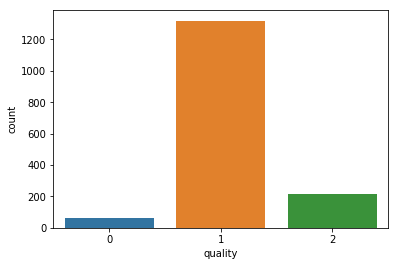

In [9]:
sns.countplot(raw_data.quality)

In [10]:
raw_data.shape

(1599, 12)

In [11]:
train_data = raw_data.iloc[:int(1599*.8), :]
test_data = raw_data.iloc[int(1599*.8) : ,:]

In [12]:
train_data.shape

(1279, 12)

In [13]:
test_data.shape

(320, 12)

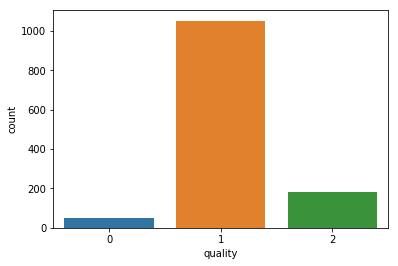

In [14]:
sns.countplot(train_data.quality)

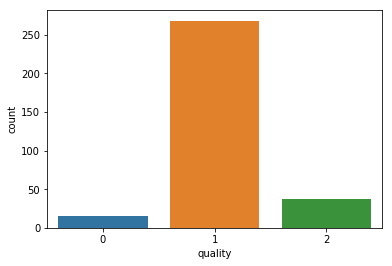

In [15]:
sns.countplot(test_data.quality)

# Making tree

In [16]:
column_names = train_data.columns.tolist()

In [17]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_data

array([[6.8, 0.48, 0.25, ..., 0.6, 10.4, 1],
       [8.3, 0.845, 0.01, ..., 0.58, 11.0, 0],
       [7.5, 0.27, 0.34, ..., 0.64, 11.0, 2],
       ...,
       [6.0, 0.64, 0.05, ..., 0.78, 10.6, 1],
       [13.2, 0.38, 0.55, ..., 0.54, 9.4, 1],
       [6.2, 0.64, 0.09, ..., 0.63, 12.0, 1]], dtype=object)

In [18]:
class DividePoint:
    """A Divide is used to partition a dataset.
    This class just records a 'column number'
    """
    def __init__(self , data , column):
        self.column = column
        self.median = np.median(sorted(data[:,column]))

    def match(self, example): 
        return example[self.column] <= self.median
        
    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "<="
        return "Is %s %s %s?" % (column_names[self.column], condition, str(self.median))

In [19]:
for i in range(len(column_names)):
    print(DividePoint(train_data , column = i))

Is fixed acidity <= 7.9?
Is volatile acidity <= 0.51?
Is citric acid <= 0.26?
Is residual sugar <= 2.2?
Is chlorides <= 0.079?
Is free sulfur dioxide <= 13.0?
Is total sulfur dioxide <= 37.0?
Is density <= 0.99669?
Is pH <= 3.31?
Is sulphates <= 0.62?
Is alcohol <= 10.2?
Is quality <= 1.0?


In [20]:
def partition(rows, divide_point): # divide_point is object of DividePoint class [divide_point is just used to identify 
    true_rows, false_rows = [], []  #from which column we have to divide the data] divide_point = median
    for row in rows:
        if divide_point.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return np.array(true_rows), np.array(false_rows)

In [21]:
partition(train_data,DividePoint(train_data,0)) # divide from  0'th  column median

(array([[6.8, 0.48, 0.25, ..., 0.6, 10.4, 1],
        [7.5, 0.27, 0.34, ..., 0.64, 11.0, 2],
        [5.6, 0.85, 0.05, ..., 0.82, 12.9, 2],
        ...,
        [7.7, 0.53, 0.06, ..., 0.48, 9.8, 1],
        [6.0, 0.64, 0.05, ..., 0.78, 10.6, 1],
        [6.2, 0.64, 0.09, ..., 0.63, 12.0, 1]], dtype=object),
 array([[8.3, 0.845, 0.01, ..., 0.58, 11.0, 0],
        [8.5, 0.47, 0.27, ..., 0.85, 11.1, 1],
        [12.5, 0.38, 0.6, ..., 0.73, 10.5, 1],
        ...,
        [8.0, 0.83, 0.27, ..., 0.48, 9.8, 0],
        [10.5, 0.51, 0.64, ..., 0.66, 11.8, 2],
        [13.2, 0.38, 0.55, ..., 0.54, 9.4, 1]], dtype=object))

In [22]:
def class_counts(data):
    return dict(Counter(data[:,-1]))

In [23]:
def gini(data):
    counts = class_counts(data)
    impurity = 1 # all data value are not equal 
    for each_label in counts:
        prob_of_each_label = counts[each_label] / (data.shape[0]) # each label probability
        impurity = impurity - prob_of_each_label**2
    return impurity

In [24]:
 def info_gain(left, right, parent): # it calculate average impurity of both divided sub trees.
    p = float(len(left)) / (len(left) + len(right))
    return parent - p * gini(left) - (1 - p) * gini(right)

In [25]:
true_rows, false_rows = partition(train_data, DividePoint(train_data,0))
info_gain(true_rows, false_rows , gini(train_data))

0.002285441797786919

In [26]:
for i in range(len(column_names) - 1):
    true_rows, false_rows = partition(train_data, DividePoint(train_data,i))
    print(info_gain(true_rows, false_rows , gini(train_data)))

0.002285441797786919
0.010965580057426635
0.011724651767841016
0.0007478971361727094
0.002871249880919219
0.0037777531237877665
0.006170074696314171
0.0024908716839892597
0.0010020417993784614
0.015232585558973638
0.02385902736850129


In [27]:
def find_best_split(data):
    best_gain = 0  # keep track of the best information gain  (It should be maximum i.e both distribution equally divided)
    best_divide_point = None  # keep tra in of the feature / value that produced it
    parent_uncertainty = gini(data)
    n_features = len(data[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        divide_point = DividePoint(data, col)
        true_rows, false_rows = partition(data, divide_point)
        
        if len(true_rows) == 0 or len(false_rows) == 0:
            continue
        
        gain = info_gain(true_rows, false_rows, parent_uncertainty)
        
        if gain >= best_gain:
            
            best_gain, best_divide_point = gain, divide_point

    return best_gain, best_divide_point

In [28]:
find_best_split(train_data)

(0.02385902736850129, Is alcohol <= 10.2?)

In [29]:
class Leaf:
    """A Leaf node classifies data. count number of labels present in passed node"""
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [30]:
class Decision_Node:
    """This holds a reference to the dividing_point, and to the two child nodes."""
    def __init__(self,divide_point,true_branch,false_branch):
        self.divide_point = divide_point
        self.true_branch = true_branch
        self.false_branch = false_branch
    

In [31]:
Leaf(train_data).predictions

{1: 1051, 0: 48, 2: 180}

In [32]:
level = 0
def build_tree(data):
    """Builds the tree.
    
    Rules of recursion: 
    1) Believe that it works. 
    2) Start by checking for the base case (no further information gain). 
    3) Prepare for giant stack traces.
    """
    global level
    gain, divide_point_column = find_best_split(data)
    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(data)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(data, divide_point_column)

    #print(true_rows,false_rows)
    #level = level+1# Recursively build the true branch.
    
    true_branch = build_tree(true_rows)
    
    false_branch = build_tree(false_rows)

    
    return Decision_Node(divide_point_column, true_branch, false_branch)

In [33]:
my_tree  = build_tree(train_data)

In [34]:
def print_tree(node, spacing=" "):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.divide_point))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [35]:
print_tree(my_tree)

 Is alcohol <= 10.2?
 --> True:
   Is alcohol <= 9.5?
   --> True:
     Is alcohol <= 9.4?
     --> True:
       Is free sulfur dioxide <= 14.0?
       --> True:
         Is alcohol <= 9.25?
         --> True:
           Is volatile acidity <= 0.545?
           --> True:
             Is total sulfur dioxide <= 24.5?
             --> True:
               Is free sulfur dioxide <= 6.0?
               --> True:
                 Predict {1: 12}
               --> False:
                 Is pH <= 3.0949999999999998?
                 --> True:
                   Predict {2: 2}
                 --> False:
                   Is alcohol <= 9.125?
                   --> True:
                     Predict {0: 1}
                   --> False:
                     Predict {1: 1}
             --> False:
               Predict {1: 16}
           --> False:
             Is chlorides <= 0.093?
             --> True:
               Is sulphates <= 0.59?
               --> True:
                 Is chlor

                   --> True:
                     Predict {1: 2}
                   --> False:
                     Predict {2: 1}
                 --> False:
                   Predict {2: 2}
               --> False:
                 Predict {1: 4}
         --> False:
           Is fixed acidity <= 10.4?
           --> True:
             Is pH <= 3.275?
             --> True:
               Is density <= 0.9982500000000001?
               --> True:
                 Is chlorides <= 0.08?
                 --> True:
                   Predict {2: 3}
                 --> False:
                   Predict {1: 2}
               --> False:
                 Predict {2: 5}
             --> False:
               Is pH <= 3.385?
               --> True:
                 Is density <= 0.99745?
                 --> True:
                   Predict {2: 3}
                 --> False:
                   Is sulphates <= 0.77?
                   --> True:
                     Predict {2: 1}
          

In [36]:
def classify(data, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.divide_point.match(data):  # check each - each rows
        return classify(data, node.true_branch)
    else:
        return classify(data, node.false_branch)

In [37]:
classify(train_data[0], my_tree) # train_data belong to that tree which contains 36 row's of 1's

{1: 41}

In [38]:
def accuracy(data):
    c = 0
    for i in data:
        m =  max(classify(i,my_tree).items() , key=oper.itemgetter(1))[0]
        if i[-1] == m:
            c+=1
    print('Accuracy : ',(c/data.shape[0])*100)

In [39]:
accuracy(train_data)
accuracy(test_data)


Accuracy :  100.0
Accuracy :  82.8125


In [40]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [41]:
for row in train_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: 1. Predicted: {1: '100%'}
Actual: 0. Predicted: {0: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Pre

Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Pre

Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 0. Predicted: {0: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 1. Predicted: {1: '100%'}
Actual: 2. Predicted: {2: '100%'}
Actual: 1. Pre